# Exploratory Data Analysis

This notebook explores data using a dataset extracted from [Telco Customer Churn on Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). Each row represents a customer, and each column contains the customer's attributes as described in the metadata. The raw dataset consists of 7,043 rows (customers) and 21 columns (features). There are no null or blank values in the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


| Column | Description |
| --- | --- |
| customerID | Customer identification |
| gender | Customer gender (Male, Female) |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer's internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | Customer's contract (Monthly, Annual, Biennial) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | Customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | Customer's monthly charges |
| TotalCharges | Customer's total charges |
| Churn | Whether the customer has churned or not (Yes, No) |

For this analysis, a new column was created to classify whether the customer subscribed to one service (Phone and Internet) or both services.

In [3]:
df['Service'] = None
df.loc[(df['PhoneService'] != 'No') & (df['InternetService'] == 'No'), 'Service'] = "Just Phone"
df.loc[(df['PhoneService'] == 'No') & (df['InternetService'] != 'No'), 'Service'] = "Just Internet"
df.loc[(df['PhoneService'] != 'No') & (df['InternetService'] != 'No'), 'Service'] = "Both"

Three additional columns were created to classify the internet services as follows:

| Columns | New Column Created |
| --- | --- |
| OnlineSecurity and OnlineBackup | OnlineService (Yes, No) |
| DeviceProtection and TechSupport | SecurityHelp (Yes, No) |
| StreamingTV and StreamingMovies | Streaming (Yes, No) |

In [4]:
df['OnlineService'] = df.apply(lambda row: 'Yes' if row['OnlineSecurity'] == 'Yes' or row['OnlineBackup'] == 'Yes' else 'No', axis=1)
df['SecurityHelp'] = df.apply(lambda row: 'Yes' if row['DeviceProtection'] == 'Yes' or row['TechSupport'] == 'Yes' else 'No', axis=1)
df['Streaming'] = df.apply(lambda row: 'Yes' if row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes' else 'No', axis=1)

For three new columns, another one emerges to count the number of internet servers with customers.

| New Column | Description |
|------------|-------------|
| InternetServicesSum | Sum of internet services. |

In [5]:
df['InternetServicesSum'] = df[['OnlineService', 'SecurityHelp', 'Streaming']].apply(lambda x: x.map({'Yes': 1, 'No': 0})).sum(axis=1)

---
To simplify visualization in this notebook, functions were created to plot the graphics.

In [6]:
def plot_histogram(name_col):
    plt.figure(figsize=(6, 4), facecolor='#efefef')
    plt.hist(df[name_col], bins = 3, color='#38a0e8', alpha=0.7)
    plt.gca().set_facecolor('#efefef')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(f'{name_col} Histogram')
    plt.xticks(df[name_col])
    plt.show()

def plot_bars_2col(name_col):
    plt.figure(figsize=(6, 4), facecolor='#efefef')
    service_counts = df[df['Churn'] == 'Yes'][name_col].value_counts()
    service_counts = service_counts.sort_index()
    service_no_counts = df[df['Churn'] == 'No'][name_col].value_counts()
    service_no_counts = service_no_counts.sort_index()

    bar_width = 0.35
    index = range(len(service_counts))

    plt.bar(index, service_counts, bar_width, label='Churn', color='#e05858', alpha=0.7)
    plt.bar([i + bar_width for i in index], service_no_counts, bar_width, label='No Churn', color='#38a0e8', alpha=0.7)
    plt.gca().set_facecolor('#efefef')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(f'Churn by {name_col}', pad=40)
    plt.xticks([i + bar_width / 2 for i in index], service_counts.index)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=2, frameon=False)
    
    plt.show()
       
def plot_bars_1col(name_col):
    plt.figure(figsize=(6, 4), facecolor='#efefef')
    if df[name_col].dtype == 'float64':
        df[name_col] = df[name_col].astype(int)
    service_counts = df[df['Churn'] == 'Yes'][name_col].value_counts().sort_index()
    
    bar_width = 0.35
    index = range(int(df[name_col].min()), len(service_counts) + int(df[name_col].min()))

    plt.bar(index, service_counts, bar_width, label='Churn', color='#e05858', alpha=0.7)
    plt.gca().set_facecolor('#efefef')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.title(f'Churn by {name_col}', pad=40)
    plt.xticks(range(0, int(df[name_col].max()) + 1, 10))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=2, frameon=False)
    plt.show()

def plot_pie(sizes, labels, colors, titlegraphic):
    plt.figure(figsize=(8, 6), facecolor='#efefef')
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
    plt.gca().set_facecolor('#efefef')
    plt.title(f'{titlegraphic}', pad=40)
    plt.axis('equal')
    plt.show()

---
# Analysis


## Churn Rate

On the first analysis, we found in the histogram that according to our database, we have a churn rate of 26.5%.

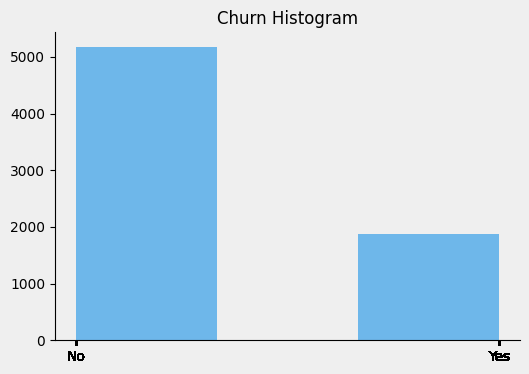


    No Churn: 5,174
    Churn: 1,869 (26.5%)



In [7]:
churn_counts = df['Churn'].value_counts()
x_churn = (churn_counts.iloc[1]/(churn_counts.iloc[1]+churn_counts.iloc[0]))*100

plot_histogram('Churn')

print(f'''
    No Churn: {churn_counts.iloc[0]:,}
    Churn: {churn_counts.iloc[1]:,} ({x_churn:,.1f}%)
''')

---
## Type of Services

Analyzing the services, we found that churn is concentrated among customers who have both services (internet and phone), with a churn rate of 32.8% in this category. Customers who have only the internet service have a churn rate of 18.1%. And customers who use only the phone service are the most likely to continue with the service, with a churn rate of 10.7%.

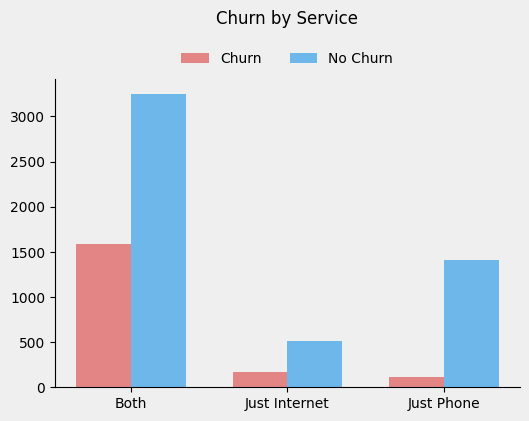


Both
    No Churn: 3,249
    Churn: 1,586 (32.8%)
Just Internet
    No Churn: 512
    Churn: 113 (18.1%)
Just Phone
    No Churn: 1,413
    Churn: 170 (10.7%)



In [8]:
service_counts_no_churn = df[df['Churn'] == 'No']['Service'].value_counts()
service_counts_churn = df[df['Churn'] == 'Yes']['Service'].value_counts()
x_service_both = (service_counts_churn.iloc[0]/(service_counts_no_churn.iloc[0]+service_counts_churn.iloc[0]))*100
x_service_phone = (service_counts_churn.iloc[1]/(service_counts_no_churn.iloc[1]+service_counts_churn.iloc[1]))*100
x_service_internet = (service_counts_churn.iloc[2]/(service_counts_no_churn.iloc[2]+service_counts_churn.iloc[2]))*100

plot_bars_2col('Service')

print(f'''
Both
    No Churn: {service_counts_no_churn.iloc[0]:,}
    Churn: {service_counts_churn.iloc[0]:,} ({x_service_both:,.1f}%)
Just Internet
    No Churn: {service_counts_no_churn.iloc[2]:,}
    Churn: {service_counts_churn.iloc[2]:,} ({x_service_internet:,.1f}%)
Just Phone
    No Churn: {service_counts_no_churn.iloc[1]:,}
    Churn: {service_counts_churn.iloc[1]:,} ({x_service_phone:,.1f}%)
''')

---
## Phone Service

Analyzing only the phone service, we see a churn rate of 24.9% for customers who do not use the service, and a churn rate of 26.7% for customers who use the service. Notice that the difference is only 1.8 percentage points. This shows us that the difference between having or not having the phone service does not have much influence on the overall churn rate.

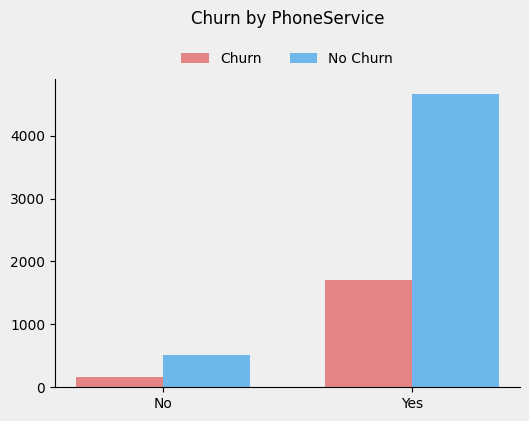


No PhoneService
    No Churn: 512
    Churn: 170 (24.9%)
PhoneService
    No Churn: 4,662
    Churn: 1,699 (26.7%)



In [9]:
phone_counts_no_churn = df[df['Churn'] == 'No']['PhoneService'].value_counts()
phone_counts_churn = df[df['Churn'] == 'Yes']['PhoneService'].value_counts()
x_phone_no = (phone_counts_churn.iloc[1]/(phone_counts_no_churn.iloc[1]+phone_counts_churn.iloc[1]))*100
x_phone_yes = (phone_counts_churn.iloc[0]/(phone_counts_no_churn.iloc[0]+phone_counts_churn.iloc[0]))*100

plot_bars_2col('PhoneService')

print(f'''
No PhoneService
    No Churn: {phone_counts_no_churn.iloc[1]:,}
    Churn: {phone_counts_churn.iloc[1]:,} ({x_phone_no:,.1f}%)
PhoneService
    No Churn: {phone_counts_no_churn.iloc[0]:,}
    Churn: {phone_counts_churn.iloc[0]:,} ({x_phone_yes:,.1f}%)
''')

---
## Multiple Lines

Similar to the previous analysis, we have a small difference in percentage points. Customers who do not have multiple phone lines have a churn rate of 25.1%, while those with multiple lines have a churn rate of 28.6%, resulting in a difference of 3.5 percentage points. We conclude that this attribute also has little relevance to the overall churn rate.

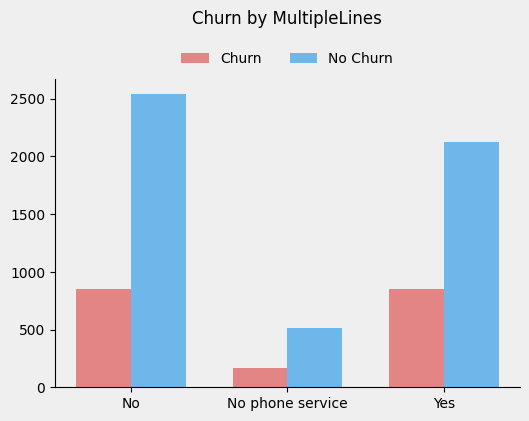


No MultipleLines
    No Churn: 2,541
    Churn: 850 (25.1%)
MultipleLines
    No Churn: 2,121
    Churn: 849 (28.6%)



In [10]:
lines_counts_no_churn = df[df['Churn'] == 'No']['MultipleLines'].value_counts()
lines_counts_churn = df[df['Churn'] == 'Yes']['MultipleLines'].value_counts()
x_lines_no = (lines_counts_churn.iloc[0]/(lines_counts_no_churn.iloc[0]+lines_counts_churn.iloc[0]))*100
x_lines_yes = (lines_counts_churn.iloc[1]/(lines_counts_no_churn.iloc[1]+lines_counts_churn.iloc[1]))*100

plot_bars_2col('MultipleLines')

print(f'''
No MultipleLines
    No Churn: {lines_counts_no_churn.iloc[0]:,}
    Churn: {lines_counts_churn.iloc[0]:,} ({x_lines_no:,.1f}%)
MultipleLines
    No Churn: {lines_counts_no_churn.iloc[1]:,}
    Churn: {lines_counts_churn.iloc[1]:,} ({x_lines_yes:,.1f}%)
''')

---
## Internet Service

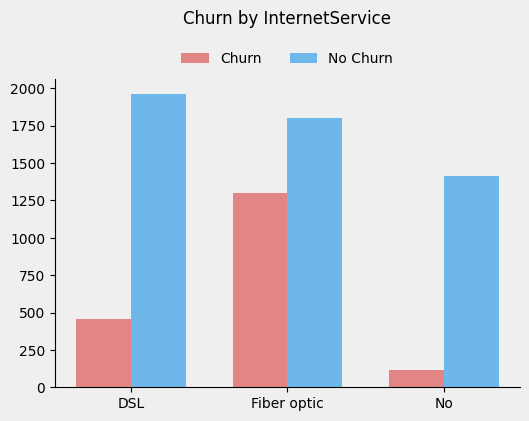


Fiber optic
    No Churn: 1,799
    Churn: 1,297 (41.9%)
DSL
    No Churn: 1,962
    Churn: 459 (19.0%)
--------------------------
Fiber + DSL
    No Churn: 3,761
    Churn: 1,756 (31.8%)   
   
No
    No Churn: 1,413
    Churn: 113 (7.4%)



In [11]:
internet_counts_no_churn = df[df['Churn'] == 'No']['InternetService'].value_counts()
internet_counts_churn = df[df['Churn'] == 'Yes']['InternetService'].value_counts()
x_internet_fiber = (internet_counts_churn.iloc[0]/(internet_counts_no_churn.iloc[1]+internet_counts_churn.iloc[0]))*100
x_internet_dsl = (internet_counts_churn.iloc[1]/(internet_counts_no_churn.iloc[0]+internet_counts_churn.iloc[1]))*100
x_internet_internet = ((internet_counts_churn.iloc[0]+internet_counts_churn.iloc[1])/((internet_counts_no_churn.iloc[1]+internet_counts_no_churn.iloc[0])+(internet_counts_churn.iloc[0]+internet_counts_churn.iloc[1])))*100
x_internet_no = (internet_counts_churn.iloc[2]/(internet_counts_no_churn.iloc[2]+internet_counts_churn.iloc[2]))*100

plot_bars_2col('InternetService')

print(f'''
Fiber optic
    No Churn: {internet_counts_no_churn.iloc[1]:,}
    Churn: {internet_counts_churn.iloc[0]:,} ({x_internet_fiber:,.1f}%)
DSL
    No Churn: {internet_counts_no_churn.iloc[0]:,}
    Churn: {internet_counts_churn.iloc[1]:,} ({x_internet_dsl:,.1f}%)
--------------------------
Fiber + DSL
    No Churn: {internet_counts_no_churn.iloc[1]+internet_counts_no_churn.iloc[0]:,}
    Churn: {internet_counts_churn.iloc[0]+internet_counts_churn.iloc[1]:,} ({x_internet_internet:,.1f}%)   
   
No
    No Churn: {internet_counts_no_churn.iloc[2]:,}
    Churn: {internet_counts_churn.iloc[2]:,} ({x_internet_no:,.1f}%)
''')

In this analysis, it is possible to observe that the internet service is the attribute of great relevance to the churn outcome. Customers who do not use the internet service have a churn rate of 7.4%, while those who have the internet service have a rate of 31.8%. Analyzing the type of internet service technology, we found that those with fiber optic are the most likely to cancel the service, with a churn rate of 41.9%.
Due to the importance of this attribute, we will further analyze the customers who churned and were using fiber optic technology.

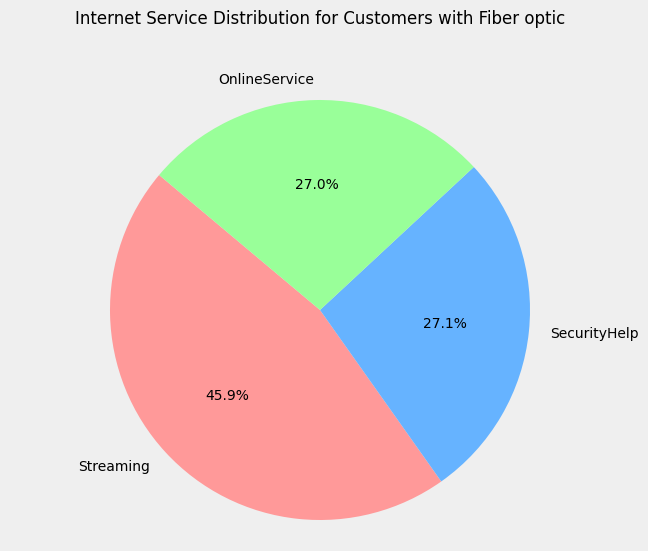


Streaming: 875 (45.9%)
SecurityHelp: 517 (27.1%)
OnlineService: 514 (27.0%)



In [12]:
internet_counts_churn_Streaming = len(df[(df['Churn'] == 'Yes') & (df['InternetService'] == 'Fiber optic') & (df['Streaming'] == 'Yes')].value_counts())
internet_counts_churn_SecurityHelp = len(df[(df['Churn'] == 'Yes') & (df['InternetService'] == 'Fiber optic') & (df['SecurityHelp'] == 'Yes')].value_counts())
internet_counts_churn_OnlineService = len(df[(df['Churn'] == 'Yes') & (df['InternetService'] == 'Fiber optic') & (df['OnlineService'] == 'Yes')].value_counts())
total = internet_counts_churn_Streaming + internet_counts_churn_SecurityHelp + internet_counts_churn_OnlineService

labels = ['Streaming', 'SecurityHelp', 'OnlineService']
sizes = [internet_counts_churn_Streaming, internet_counts_churn_SecurityHelp, internet_counts_churn_OnlineService]
colors = ['#ff9999','#66b3ff','#99ff99']

plot_pie(sizes, labels, colors, 'Internet Service Distribution for Customers with Fiber optic')

print(f'''
Streaming: {internet_counts_churn_Streaming:,} ({(internet_counts_churn_Streaming/total)*100:,.1f}%)
SecurityHelp: {internet_counts_churn_SecurityHelp:,} ({(internet_counts_churn_SecurityHelp/total)*100:,.1f}%)
OnlineService: {internet_counts_churn_OnlineService:,} ({(internet_counts_churn_OnlineService/total)*100:,.1f}%)
''')

Of the 1,297 customers who used fiber optic and canceled the service, 45.9% used the Streaming service, which leads us to hypothesize that this factor may be the most relevant for the churn rate.

This hypothesis is confirmed in the following three analyses, where those who use the Online Service and the Security and Help Services are less likely to cancel the service. Below is a summary of the respective rates:

**Online Service**: 21.0% churn rate.
Without this service: 31.4% churn rate.

**Security and Help**: 21.7% churn rate.
Without this service: 30.7% churn rate.

**Streaming**: 30.3% churn rate.
Without this service: 22,8% churn rate.

---
## Online Service (OnlineSecurity and OnlineBackup)

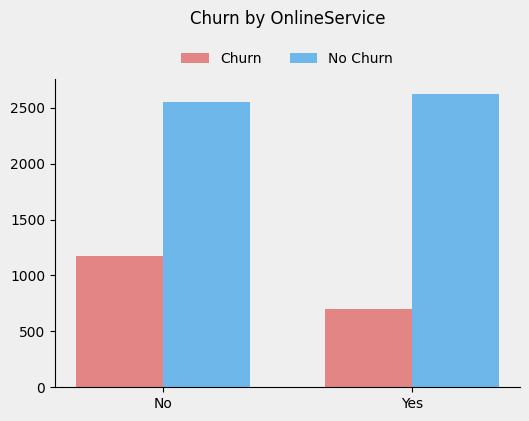


No OnlineService
    No Churn: 2,551
    Churn: 1,170 (31.4%)
OnlineService
    No Churn: 2,623
    Churn: 699 (21.0%)



In [13]:
online_counts_no_churn = df[df['Churn'] == 'No']['OnlineService'].value_counts()
online_counts_churn = df[df['Churn'] == 'Yes']['OnlineService'].value_counts()
x_online_no = (online_counts_churn.iloc[0]/(online_counts_no_churn.iloc[1]+online_counts_churn.iloc[0]))*100
x_online_yes = (online_counts_churn.iloc[1]/(online_counts_no_churn.iloc[0]+online_counts_churn.iloc[1]))*100

plot_bars_2col('OnlineService')

print(f'''
No OnlineService
    No Churn: {online_counts_no_churn.iloc[1]:,}
    Churn: {online_counts_churn.iloc[0]:,} ({x_online_no:,.1f}%)
OnlineService
    No Churn: {online_counts_no_churn.iloc[0]:,}
    Churn: {online_counts_churn.iloc[1]:,} ({x_online_yes:,.1f}%)
''')

---
## Security and Help (DeviceProtection and TechSupport)

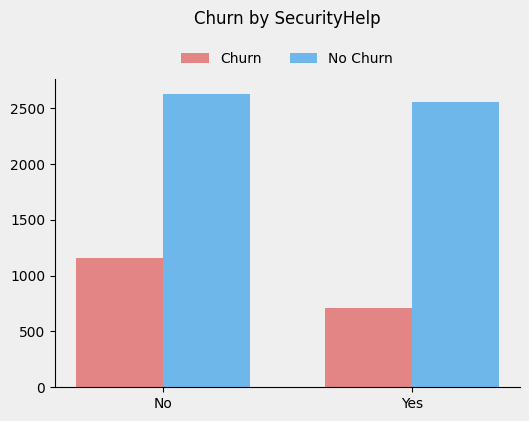


No SecurityHelp
    No Churn: 2,625
    Churn: 1,161 (30.7%)
SecurityHelp
    No Churn: 2,549
    Churn: 708 (21.7%)



In [14]:
sech_counts_no_churn = df[df['Churn'] == 'No']['SecurityHelp'].value_counts()
sech_counts_churn = df[df['Churn'] == 'Yes']['SecurityHelp'].value_counts()
x_sech_no = (sech_counts_churn.iloc[0]/(sech_counts_no_churn.iloc[0]+sech_counts_churn.iloc[0]))*100
x_sech_yes = (sech_counts_churn.iloc[1]/(sech_counts_no_churn.iloc[1]+sech_counts_churn.iloc[1]))*100

plot_bars_2col('SecurityHelp')

print(f'''
No SecurityHelp
    No Churn: {sech_counts_no_churn.iloc[0]:,}
    Churn: {sech_counts_churn.iloc[0]:,} ({x_sech_no:,.1f}%)
SecurityHelp
    No Churn: {sech_counts_no_churn.iloc[1]:,}
    Churn: {sech_counts_churn.iloc[1]:,} ({x_sech_yes:,.1f}%)
''')

---
## Streaming (StreamingTV and StreamingMovies)

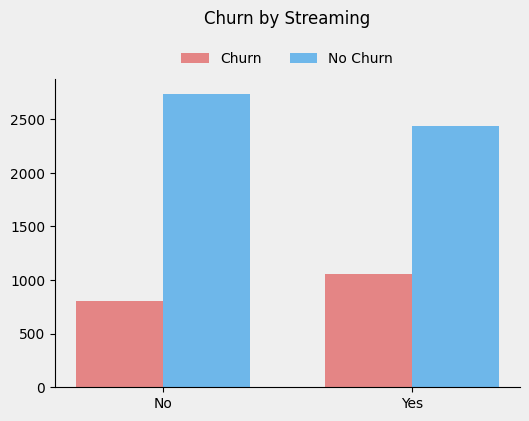


No Streaming
    No Churn: 2,736
    Churn: 808 (22.8%)
Streaming
    No Churn: 2,438
    Churn: 1,061 (30.3%)



In [15]:
str_counts_no_churn = df[df['Churn'] == 'No']['Streaming'].value_counts()
str_counts_churn = df[df['Churn'] == 'Yes']['Streaming'].value_counts()
x_str_no = (str_counts_churn.iloc[1]/(str_counts_no_churn.iloc[0]+str_counts_churn.iloc[1]))*100
x_str_yes = (str_counts_churn.iloc[0]/(str_counts_no_churn.iloc[1]+str_counts_churn.iloc[0]))*100

plot_bars_2col('Streaming')

print(f'''
No Streaming
    No Churn: {str_counts_no_churn.iloc[0]:,}
    Churn: {str_counts_churn.iloc[1]:,} ({x_str_no:,.1f}%)
Streaming
    No Churn: {str_counts_no_churn.iloc[1]:,}
    Churn: {str_counts_churn.iloc[0]:,} ({x_str_yes:,.1f}%)
''')

---
## Number of Internet Services

According to the initial modeling, there are three types of internet services: Online Service, Security and Help, and Streaming. This led to the question: Is there a difference in the churn rate based on the number of internet services a customer has? From the analysis, we found that those who have only one service are more likely to cancel, with a churn rate of 45.4%. We also found that the more internet services subscribed to, the lower the chance of the customer canceling the service.

01 Service: **45.4% churn rate.**

02 Services: **29.1% churn rate.**

03 Services: **16.1% churn rate.**

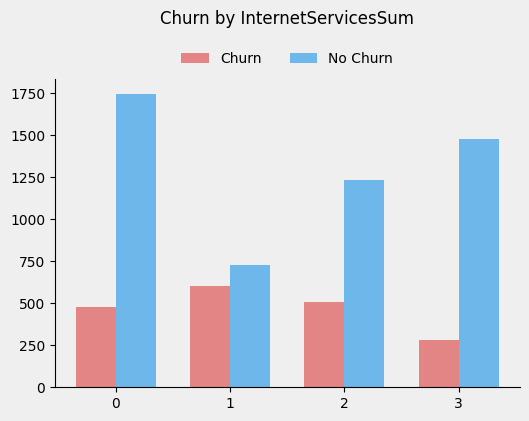


0 Service
    No Churn: 1,744
    Churn: 475 (21.4%)
1 Service
    No Churn: 725
    Churn: 604 (45.4%)
2 Services
    No Churn: 1,230
    Churn: 506 (29.1%)
3 Services
    No Churn: 1,475
    Churn: 284 (16.1%)



In [16]:
iss_counts_no_churn = df[df['Churn'] == 'No']['InternetServicesSum'].value_counts()
iss_counts_churn = df[df['Churn'] == 'Yes']['InternetServicesSum'].value_counts()
x_iss_0 = (iss_counts_churn.iloc[2]/(iss_counts_no_churn.iloc[0]+iss_counts_churn.iloc[2]))*100
x_iss_1 = (iss_counts_churn.iloc[0]/(iss_counts_no_churn.iloc[3]+iss_counts_churn.iloc[0]))*100
x_iss_2 = (iss_counts_churn.iloc[1]/(iss_counts_no_churn.iloc[2]+iss_counts_churn.iloc[1]))*100
x_iss_3 = (iss_counts_churn.iloc[3]/(iss_counts_no_churn.iloc[1]+iss_counts_churn.iloc[3]))*100

plot_bars_2col('InternetServicesSum')

print(f'''
0 Service
    No Churn: {iss_counts_no_churn.iloc[0]:,}
    Churn: {iss_counts_churn.iloc[2]:,} ({x_iss_0:,.1f}%)
1 Service
    No Churn: {iss_counts_no_churn.iloc[3]:,}
    Churn: {iss_counts_churn.iloc[0]:,} ({x_iss_1:,.1f}%)
2 Services
    No Churn: {iss_counts_no_churn.iloc[2]:,}
    Churn: {iss_counts_churn.iloc[1]:,} ({x_iss_2:,.1f}%)
3 Services
    No Churn: {iss_counts_no_churn.iloc[1]:,}
    Churn: {iss_counts_churn.iloc[3]:,} ({x_iss_3:,.1f}%)
''')

Next, we analyzed the customers who churned and had only one internet service.

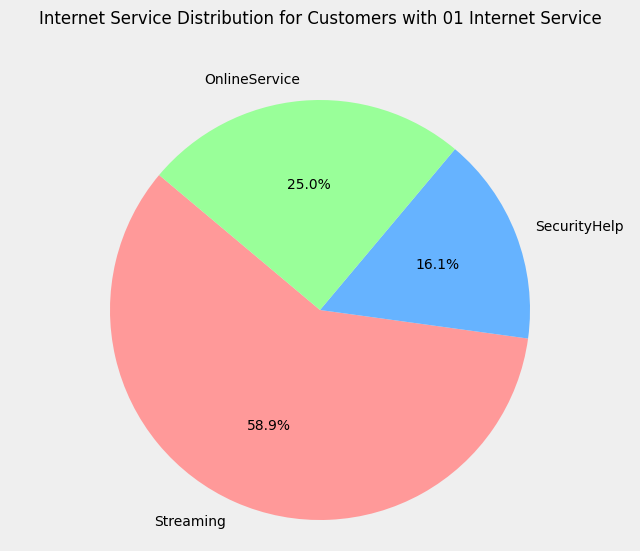


Streaming: 356 (58.9%)
SecurityHelp: 97 (16.1%)
OnlineService: 151 (25.0%)



In [17]:
iss_counts_churn_Streaming = len(df[(df['Churn'] == 'Yes') & (df['InternetServicesSum'] == 1) & (df['Streaming'] == 'Yes')].value_counts())
iss_counts_churn_SecurityHelp = len(df[(df['Churn'] == 'Yes') & (df['InternetServicesSum'] == 1) & (df['SecurityHelp'] == 'Yes')].value_counts())
iss_counts_churn_OnlineService = len(df[(df['Churn'] == 'Yes') & (df['InternetServicesSum'] == 1) & (df['OnlineService'] == 'Yes')].value_counts())
total = iss_counts_churn_Streaming + iss_counts_churn_SecurityHelp + iss_counts_churn_OnlineService

labels = ['Streaming', 'SecurityHelp', 'OnlineService']
sizes = [iss_counts_churn_Streaming, iss_counts_churn_SecurityHelp, iss_counts_churn_OnlineService]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0, 0)  # explode the 1st slice

plot_pie(sizes, labels, colors, 'Internet Service Distribution for Customers with 01 Internet Service')

print(f'''
Streaming: {iss_counts_churn_Streaming:,} ({(iss_counts_churn_Streaming/total)*100:,.1f}%)
SecurityHelp: {iss_counts_churn_SecurityHelp:,} ({(iss_counts_churn_SecurityHelp/total)*100:,.1f}%)
OnlineService: {iss_counts_churn_OnlineService:,} ({(iss_counts_churn_OnlineService/total)*100:,.1f}%)
''')

As we can confirm again, the highest probability of cancellation is among those who have the Streaming service. To determine the reason, more data is needed, such as satisfaction survey forms or market analysis. However, the fact is that 58.9% of customers who had only one internet service used Streaming, continuing to be the main attribute for churn.

---
## Gender

We found that the difference of only 0.4 percentage points between genders confirms that this attribute does not influence the churn rate.

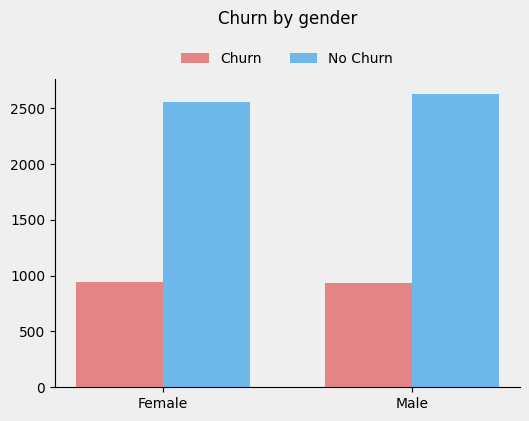


Female
    No Churn: 2,625
    Churn: 939 (26.3%)
Male
    No Churn: 2,549
    Churn: 930 (26.7%)



In [18]:
gender_counts_no_churn = df[df['Churn'] == 'No']['gender'].value_counts()
gender_counts_churn = df[df['Churn'] == 'Yes']['gender'].value_counts()
x_gender_female = (gender_counts_churn.iloc[0]/(gender_counts_no_churn.iloc[0]+gender_counts_churn.iloc[0]))*100
x_gender_male = (gender_counts_churn.iloc[1]/(gender_counts_no_churn.iloc[1]+gender_counts_churn.iloc[1]))*100

plot_bars_2col('gender')

print(f'''
Female
    No Churn: {gender_counts_no_churn.iloc[0]:,}
    Churn: {gender_counts_churn.iloc[0]:,} ({x_gender_female:,.1f}%)
Male
    No Churn: {gender_counts_no_churn.iloc[1]:,}
    Churn: {gender_counts_churn.iloc[1]:,} ({x_gender_male:,.1f}%)
''')

---
## Senior Citizen

We see that this is a relevant attribute, even though the number of senior citizens is smaller, the churn rate is 41.7%.

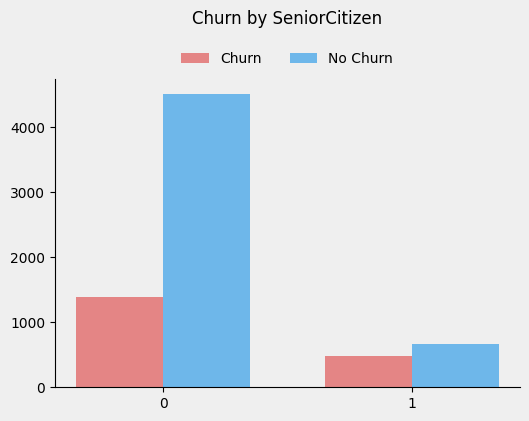


No Senior Citizen
    No Churn: 4,508
    Churn: 1,393 (23.6%)
Senior Citizen
    No Churn: 666
    Churn: 476 (41.7%)



In [19]:
seniorcit_counts_no_churn = df[df['Churn'] == 'No']['SeniorCitizen'].value_counts()
seniorcit_counts_churn = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts()
x_seniorcit_no = (seniorcit_counts_churn.iloc[0]/(seniorcit_counts_no_churn.iloc[0]+seniorcit_counts_churn.iloc[0]))*100
x_seniorcit_yes = (seniorcit_counts_churn.iloc[1]/(seniorcit_counts_no_churn.iloc[1]+seniorcit_counts_churn.iloc[1]))*100

plot_bars_2col('SeniorCitizen')

print(f'''
No Senior Citizen
    No Churn: {seniorcit_counts_no_churn.iloc[0]:,}
    Churn: {seniorcit_counts_churn.iloc[0]:,} ({x_seniorcit_no:,.1f}%)
Senior Citizen
    No Churn: {seniorcit_counts_no_churn.iloc[1]:,}
    Churn: {seniorcit_counts_churn.iloc[1]:,} ({x_seniorcit_yes:,.1f}%)
''')

---
## Partner

Being a partner of the company has a slight influence on the churn rate. This is evident when we calculate a churn rate of 19.7% for partners, and 33.0% for those who are not partners of the company.

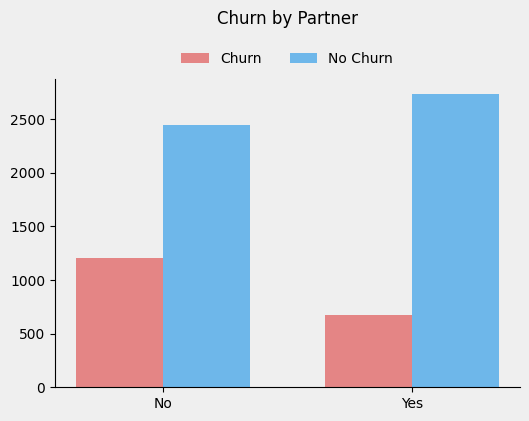


No Partner
    No Churn: 2,441
    Churn: 1,200 (33.0%)
Partner
    No Churn: 2,733
    Churn: 669 (19.7%)



In [20]:
partner_counts_no_churn = df[df['Churn'] == 'No']['Partner'].value_counts()
partner_counts_churn = df[df['Churn'] == 'Yes']['Partner'].value_counts()
x_partner_no = (partner_counts_churn.iloc[0]/(partner_counts_no_churn.iloc[1]+partner_counts_churn.iloc[0]))*100
x_partner_yes = (partner_counts_churn.iloc[1]/(partner_counts_no_churn.iloc[0]+partner_counts_churn.iloc[1]))*100

plot_bars_2col('Partner')

print(f'''
No Partner
    No Churn: {partner_counts_no_churn.iloc[1]:,}
    Churn: {partner_counts_churn.iloc[0]:,} ({x_partner_no:,.1f}%)
Partner
    No Churn: {partner_counts_no_churn.iloc[0]:,}
    Churn: {partner_counts_churn.iloc[1]:,} ({x_partner_yes:,.1f}%)
''')

---
## Dependents

In this attribute, it is possible to observe that the churn rate for those who do not have dependents is almost double that of customers who have dependents (Dependents: 15.5% churn rate; No Dependents: 31.3% churn rate). We analyzed that those without dependents rely solely on themselves to make the decision to cancel the service, whereas those with dependents may need to consider the use of the services by others.

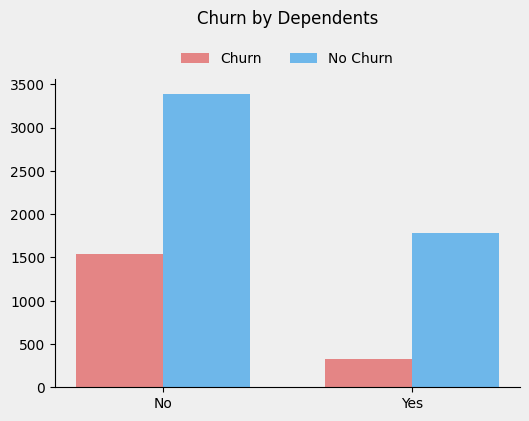


No Dependents
    No Churn: 3,390
    Churn: 1,543 (31.3%)
Dependents
    No Churn: 1,784
    Churn: 326 (15.5%)



In [21]:
dependents_counts_no_churn = df[df['Churn'] == 'No']['Dependents'].value_counts()
dependents_counts_churn = df[df['Churn'] == 'Yes']['Dependents'].value_counts()
x_dependents_no = (dependents_counts_churn.iloc[0]/(dependents_counts_no_churn.iloc[0]+dependents_counts_churn.iloc[0]))*100
x_dependents_yes = (dependents_counts_churn.iloc[1]/(dependents_counts_no_churn.iloc[1]+dependents_counts_churn.iloc[1]))*100

plot_bars_2col('Dependents')

print(f'''
No Dependents
    No Churn: {dependents_counts_no_churn.iloc[0]:,}
    Churn: {dependents_counts_churn.iloc[0]:,} ({x_dependents_no:,.1f}%)
Dependents
    No Churn: {dependents_counts_no_churn.iloc[1]:,}
    Churn: {dependents_counts_churn.iloc[1]:,} ({x_dependents_yes:,.1f}%)
''')

---
## Contract

This attribute considers the type of contract (whether it is a monthly renewal or a contract with a 1- or 2-year commitment). Notoriously, those with a monthly contract have a higher tendency to cancel the service (42.7% churn rate), and those with a 24-month commitment contract (2.8% churn rate) are more likely to renew the contract compared to those with a 12-month commitment contract (11.3% churn rate).

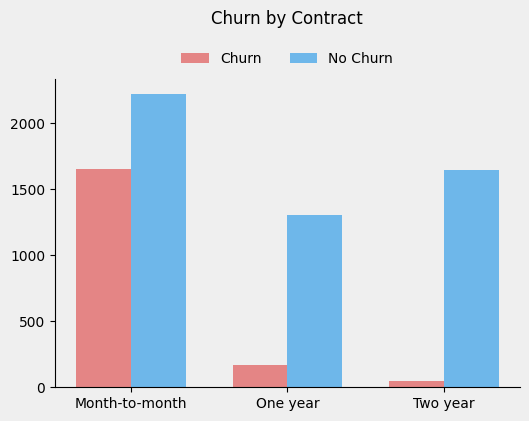


Month-to-month
    No Churn: 2,220
    Churn: 1,655 (42.7%)
One year
    No Churn: 1,307
    Churn: 166 (11.3%)
Two year
    No Churn: 1,647
    Churn: 48 (2.8%)



In [22]:
contract_counts_no_churn = df[df['Churn'] == 'No']['Contract'].value_counts()
contract_counts_churn = df[df['Churn'] == 'Yes']['Contract'].value_counts()
x_contract_monthly = (contract_counts_churn.iloc[0]/(contract_counts_no_churn.iloc[0]+contract_counts_churn.iloc[0]))*100
x_contract_one = (contract_counts_churn.iloc[1]/(contract_counts_no_churn.iloc[2]+contract_counts_churn.iloc[1]))*100
x_contract_two = (contract_counts_churn.iloc[2]/(contract_counts_no_churn.iloc[1]+contract_counts_churn.iloc[2]))*100

plot_bars_2col('Contract')

print(f'''
Month-to-month
    No Churn: {contract_counts_no_churn.iloc[0]:,}
    Churn: {contract_counts_churn.iloc[0]:,} ({x_contract_monthly:,.1f}%)
One year
    No Churn: {contract_counts_no_churn.iloc[2]:,}
    Churn: {contract_counts_churn.iloc[1]:,} ({x_contract_one:,.1f}%)
Two year
    No Churn: {contract_counts_no_churn.iloc[1]:,}
    Churn: {contract_counts_churn.iloc[2]:,} ({x_contract_two:,.1f}%)
''')

---
## Paperless Billing

It is noticeable that customers who choose paperless billing (33.6% churn rate) are more likely to cancel the service (almost double the churn rate) compared to those who opt for paper billing (16.3% churn rate). And as can be seen in the analysis below, there is a relationship between opting for paperless billing and using the Electronic check payment method.

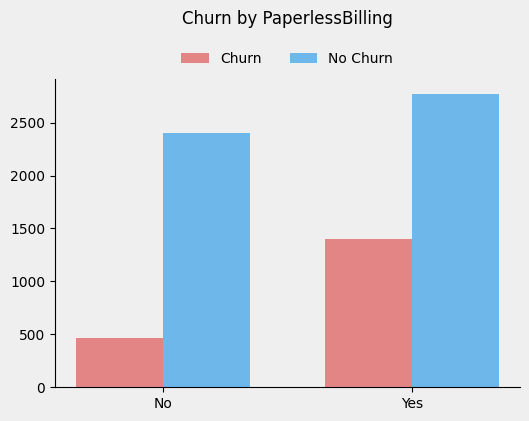


No PaperlessBilling
    No Churn: 2,403
    Churn: 469 (16.3%)
PaperlessBilling
    No Churn: 2,771
    Churn: 1,400 (33.6%)



In [23]:
paper_counts_no_churn = df[df['Churn'] == 'No']['PaperlessBilling'].value_counts()
paper_counts_churn = df[df['Churn'] == 'Yes']['PaperlessBilling'].value_counts()
x_paper_yes = (paper_counts_churn.iloc[0]/(paper_counts_no_churn.iloc[0]+paper_counts_churn.iloc[0]))*100
x_paper_no = (paper_counts_churn.iloc[1]/(paper_counts_no_churn.iloc[1]+paper_counts_churn.iloc[1]))*100

plot_bars_2col('PaperlessBilling')

print(f'''
No PaperlessBilling
    No Churn: {paper_counts_no_churn.iloc[1]:,}
    Churn: {paper_counts_churn.iloc[1]:,} ({x_paper_no:,.1f}%)
PaperlessBilling
    No Churn: {paper_counts_no_churn.iloc[0]:,}
    Churn: {paper_counts_churn.iloc[0]:,} ({x_paper_yes:,.1f}%)
''')

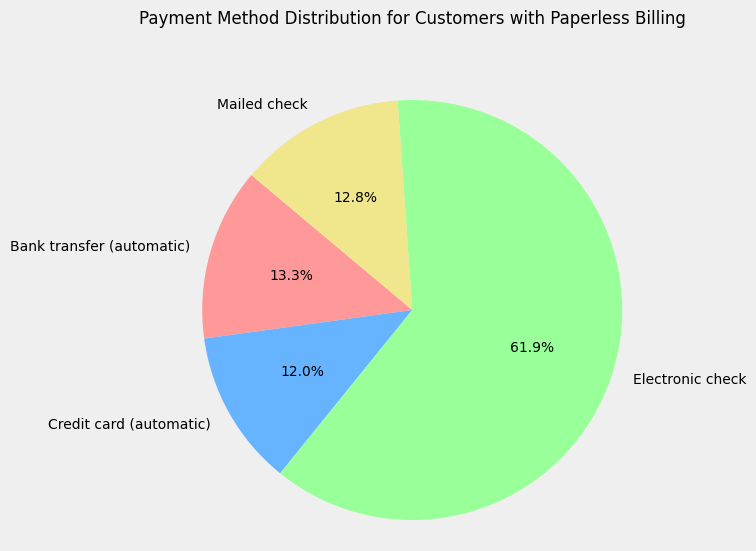


Bank transfer (automatic): 186 (13.3%)
Credit card (automatic): 168 (12.0%)
Electronic check: 867 (61.9%)
Mailed check: 179 (12.8%)



In [24]:
pb_counts_churn_bank = len(df[(df['Churn'] == 'Yes') & (df['PaperlessBilling'] == 'Yes') & (df['PaymentMethod'] == 'Bank transfer (automatic)')].value_counts())
pb_counts_churn_credit = len(df[(df['Churn'] == 'Yes') & (df['PaperlessBilling'] == 'Yes') & (df['PaymentMethod'] == 'Credit card (automatic)')].value_counts())
pb_counts_churn_elect = len(df[(df['Churn'] == 'Yes') & (df['PaperlessBilling'] == 'Yes') & (df['PaymentMethod'] == 'Electronic check')].value_counts())
pb_counts_churn_mailed = len(df[(df['Churn'] == 'Yes') & (df['PaperlessBilling'] == 'Yes') & (df['PaymentMethod'] == 'Mailed check')].value_counts())
total = pb_counts_churn_bank + pb_counts_churn_credit + pb_counts_churn_elect + pb_counts_churn_mailed

labels = ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
sizes = [pb_counts_churn_bank, pb_counts_churn_credit, pb_counts_churn_elect, pb_counts_churn_mailed]
colors = ['#ff9999','#66b3ff','#99ff99', '#f0e68c']
explode = (0, 0, 0)  # explode the 1st slice

plot_pie(sizes, labels, colors, 'Payment Method Distribution for Customers with Paperless Billing')

print(f'''
Bank transfer (automatic): {pb_counts_churn_bank:,} ({(pb_counts_churn_bank/total)*100:,.1f}%)
Credit card (automatic): {pb_counts_churn_credit:,} ({(pb_counts_churn_credit/total)*100:,.1f}%)
Electronic check: {pb_counts_churn_elect:,} ({(pb_counts_churn_elect/total)*100:,.1f}%)
Mailed check: {pb_counts_churn_mailed:,} ({(pb_counts_churn_mailed/total)*100:,.1f}%)
''')

---
## Payment Method

As can be seen, the closeness in percentage points between Bank transfer and Credit card shows that there is no difference between the two methods regarding the churn rate. Both payment methods have the same 'behavior' concerning churn. In analyzing the attribute, we divided the methods into Automatic (16.0% churn rate), Electronic check (45.3% churn rate), and Mailed check (19.1% churn rate).
Notoriously, customers who use the Electronic check payment method are the most likely to cancel the service, as observed in the previous analysis of customers who churned and opted for paperless billing.

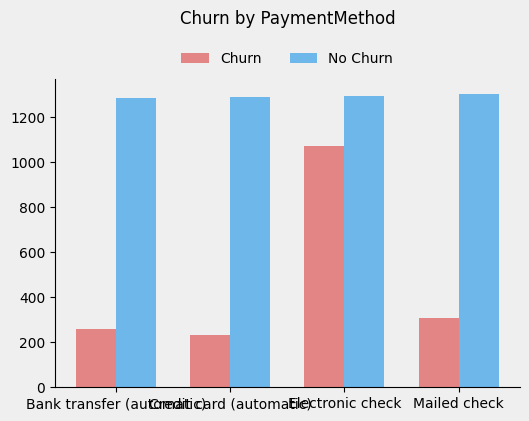


Bank transfer (automatic)
    No Churn: 1,286
    Churn: 258 (16.7%)
Credit card (automatic)
    No Churn: 1,290
    Churn: 232 (15.2%)
--------------------------
Automatic Methods
    No Churn: 2,576
    Churn: 490 (16.0%)
--------------------------
Electronic check
    No Churn: 1,294
    Churn: 1,071 (45.3%)
Mailed check
    No Churn: 1,304
    Churn: 308 (19.1%)



In [25]:
pay_counts_no_churn = df[df['Churn'] == 'No']['PaymentMethod'].value_counts()
pay_counts_churn = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()
x_pay_elec = (pay_counts_churn.iloc[0]/(pay_counts_no_churn.iloc[1]+pay_counts_churn.iloc[0]))*100
x_pay_mail = (pay_counts_churn.iloc[1]/(pay_counts_no_churn.iloc[0]+pay_counts_churn.iloc[1]))*100
x_pay_bank = (pay_counts_churn.iloc[2]/(pay_counts_no_churn.iloc[3]+pay_counts_churn.iloc[2]))*100
x_pay_card = (pay_counts_churn.iloc[3]/(pay_counts_no_churn.iloc[2]+pay_counts_churn.iloc[3]))*100
x_pay_automatic = ((pay_counts_churn.iloc[2]+pay_counts_churn.iloc[3])/((pay_counts_no_churn.iloc[2]+pay_counts_no_churn.iloc[3])+(pay_counts_churn.iloc[2]+pay_counts_churn.iloc[3])))*100

plot_bars_2col('PaymentMethod')

print(f'''
Bank transfer (automatic)
    No Churn: {pay_counts_no_churn.iloc[3]:,}
    Churn: {pay_counts_churn.iloc[2]:,} ({x_pay_bank:,.1f}%)
Credit card (automatic)
    No Churn: {pay_counts_no_churn.iloc[2]:,}
    Churn: {pay_counts_churn.iloc[3]:,} ({x_pay_card:,.1f}%)
--------------------------
Automatic Methods
    No Churn: {pay_counts_no_churn.iloc[2] + pay_counts_no_churn.iloc[3]:,}
    Churn: {pay_counts_churn.iloc[2] + pay_counts_churn.iloc[3]:,} ({(x_pay_automatic):,.1f}%)
--------------------------
Electronic check
    No Churn: {pay_counts_no_churn.iloc[1]:,}
    Churn: {pay_counts_churn.iloc[0]:,} ({x_pay_elec:,.1f}%)
Mailed check
    No Churn: {pay_counts_no_churn.iloc[0]:,}
    Churn: {pay_counts_churn.iloc[1]:,} ({x_pay_mail:,.1f}%)
''')

---
## Monthly Charges

In data analysis, the categorization of attributes is a valuable technique for simplifying the interpretation and visualization of large datasets. Two statistical methods frequently used for this purpose are the median and standard deviation. Both offer an effective way to summarize and segment data, allowing for more precise analysis and clearer insights.

**Median**
The median is the value that separates the upper half from the lower half of a dataset. It is particularly useful in skewed distributions, where the mean can be distorted by extreme values. When using the median.

**Standard Deviation**
The standard deviation is a measure of dispersion that indicates how much the data varies around the mean. It is crucial for understanding variability within a dataset.

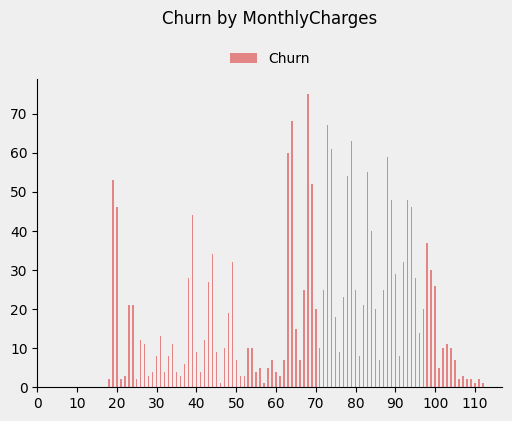


Minimum: 18.25
Mean: 64.76
Median: 70.35
Standard Deviation: 30.09
Maximum: 118.75



In [26]:
min_churn = df['MonthlyCharges'].min()
mean_churn = df['MonthlyCharges'].mean()
median_churn = df['MonthlyCharges'].median()
std_dev_churn = df['MonthlyCharges'].std()
max_churn = df['MonthlyCharges'].max()

plot_bars_1col('MonthlyCharges')

print(f'''
Minimum: {min_churn:.2f}
Mean: {mean_churn:.2f}
Median: {median_churn:.2f}
Standard Deviation: {std_dev_churn:.2f}
Maximum: {max_churn:.2f}
''')

The use of the median and standard deviation to create categories within an attribute enriches data analysis, providing a clearer and more detailed understanding of underlying patterns and trends. This approach not only enhances analytical accuracy but also supports more effective and informed decision-making.
In this analysis, considering the median of 70.35 and the standard deviation of 30.09, we created the following categories: 0-40 (values below 40), 40-70, 70-100, 100+ (values above 100).

In [27]:
df['MonthlyChargesClass'] = pd.cut(df['MonthlyCharges'], bins=[-float('inf'), 40, 70, 100, float('inf')], labels=['0-40', '40-70', '70-100', '100+'])

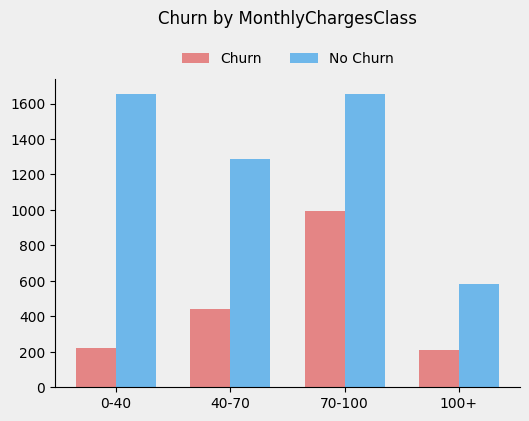


0-40
    No Churn: 1,651
    Churn: 211 (11.3%)
40-70
    No Churn: 580
    Churn: 224 (27.9%)
70-100
    No Churn: 1,654
    Churn: 995 (37.6%)
100+
    No Churn: 1,289
    Churn: 439 (25.4%)



In [28]:
mcClass_counts_no_churn = df[df['Churn'] == 'No']['MonthlyChargesClass'].value_counts()
mcClass_counts_churn = df[df['Churn'] == 'Yes']['MonthlyChargesClass'].value_counts()
mcClass_counts_no_churn, mcClass_counts_churn
x_mcClass_040 = (mcClass_counts_churn.iloc[3]/(mcClass_counts_no_churn.iloc[1]+mcClass_counts_churn.iloc[3]))*100
x_mcClass_4070 = (mcClass_counts_churn.iloc[2]/(mcClass_counts_no_churn.iloc[3]+mcClass_counts_churn.iloc[2]))*100
x_mcClass_70100 = (mcClass_counts_churn.iloc[0]/(mcClass_counts_no_churn.iloc[0]+mcClass_counts_churn.iloc[0]))*100
x_mcClass_100 = (mcClass_counts_churn.iloc[1]/(mcClass_counts_no_churn.iloc[2]+mcClass_counts_churn.iloc[1]))*100

plot_bars_2col('MonthlyChargesClass')

print(f'''
0-40
    No Churn: {mcClass_counts_no_churn.iloc[1]:,}
    Churn: {mcClass_counts_churn.iloc[3]:,} ({x_mcClass_040:,.1f}%)
40-70
    No Churn: {mcClass_counts_no_churn.iloc[3]:,}
    Churn: {mcClass_counts_churn.iloc[2]:,} ({x_mcClass_4070:,.1f}%)
70-100
    No Churn: {mcClass_counts_no_churn.iloc[0]:,}
    Churn: {mcClass_counts_churn.iloc[0]:,} ({x_mcClass_70100:,.1f}%)
100+
    No Churn: {mcClass_counts_no_churn.iloc[2]:,}
    Churn: {mcClass_counts_churn.iloc[1]:,} ({x_mcClass_100:,.1f}%)
''')

Simplifying the visualization of the analysis, we observe that people with monthly charges between 70-100 are more likely to cancel the service, with a 37.6% churn rate.

---
## Tenure

This attribute is inversely proportional to the churn rate (correlation of -0.3522). In other words, the longer the contract duration a customer has, the greater the possibility of maintaining their loyalty, which reduces the churn rate.

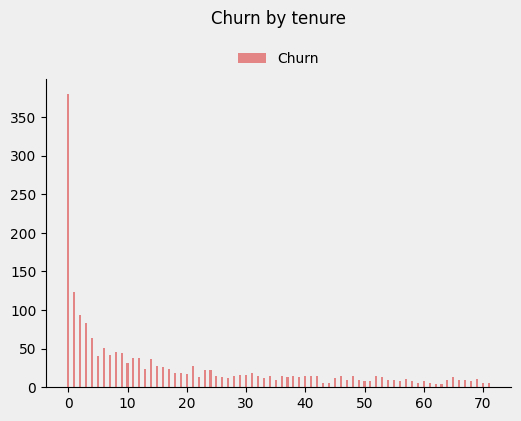

Correlation: -0.3522


In [29]:
plot_bars_1col('tenure')

df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
correlation = df['Churn_numeric'].corr(df['tenure'])
print(f'Correlation: {correlation:.4f}')

---
# Conclusion

The analysis of Telco's customer churn data revealed several important insights:


**Overall Churn Rate**: The overall churn rate is 26.5%, indicating that approximately one-quarter of customers cancel the service.

**Type of Service**: Customers who have both services (internet and phone) have a higher churn rate (32.8%) compared to those who have only internet (18.1%) or only phone (10.7%).

**Phone Service**: The difference in churn rate between customers with and without phone service is small, suggesting that phone service has little influence on churn.

**Multiple Lines**: Customers with multiple lines have a slightly higher churn rate (28.6%) than those without multiple lines (25.1%).

**Internet Service**: This is a significant attribute, with fiber optic customers having the highest churn rate (41.9%). Customers without internet service have the lowest churn rate (7.4%).

**Online Services, Security and Assistance, and Streaming**: Customers who utilize streaming services have a higher churn rate (30.3%) compared to those who use online services (21.0%) or security and assistance services (21.7%).

**Number of Internet Services**: Customers with only one internet service have the highest churn rate (45.4%), while those with three services have the lowest rate (16.1%).

**Gender**: There is no significant difference in churn rate between genders.

**Seniors Citizens**: Senior customers have a higher churn rate (41.7%) compared to non-seniors (23.6%).

**Partners**: Customers who are partners have a lower churn rate (19.7%) compared to those who are not partners (33.0%).

**Dependents**: Customers without dependents have a higher churn rate (31.3%) compared to those with dependents (15.5%).

**Contract**: Customers with monthly contracts have the highest churn rate (42.7%), while those with 24-month contracts have the lowest rate (2.8%).

**Paperless Billing**: Customers who opt for paperless billing have a higher churn rate (33.6%) compared to those who choose paper billing (16.3%).

**Payment Method**: Customers who use electronic checks have the highest churn rate (45.3%), while those who use automatic methods (bank transfer or credit card) have the lowest rate (16.0%).

**Monthly Charges**: Customers with monthly charges between 70-100 have the highest churn rate (37.6%).

**Contract Length (Tenure)**: There is a negative correlation between contract length and churn rate (-0.3522), indicating that customers with longer contracts are less likely to cancel the service.

These insights can help Telco identify areas for improvement and develop strategies to reduce the churn rate, such as offering incentives for longer contracts, enhancing satisfaction with streaming services, and reviewing billing options and payment methods.

[<< Project Homepage](README.md) | [Machine Learning Model >>](machine_learning_model_churn.ipynb)